 # Full Code: Train and Apply U-Net for Semantic Segmentation

In [3]:
pip install tensorflow opencv-python matplotlib numpy


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os


In [5]:
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)

    # Encoder (Downsampling)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder (Upsampling)
    up4 = layers.Conv2DTranspose(128, 3, strides=(2, 2), padding='same')(conv3)
    merge4 = layers.concatenate([conv2, up4], axis=3)
    conv4 = layers.Conv2D(128, 3, activation='relu', padding='same')(merge4)

    up5 = layers.Conv2DTranspose(64, 3, strides=(2, 2), padding='same')(conv4)
    merge5 = layers.concatenate([conv1, up5], axis=3)
    conv5 = layers.Conv2D(64, 3, activation='relu', padding='same')(merge5)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv5)  # Sigmoid for binary segmentation

    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = unet_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 64, 64, 64)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 32, 32, 128)    │              0 │ conv2d_8[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 256)    │        590,080 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 64, 64, 128)    │        295,040 │ conv2d_10[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 256)    │              0 │ conv2d_8[0][0],        │
│                           │                        │                │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 64, 64, 128)    │        295,040 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 128, 128, 64)   │         73,792 │ conv2d_11[0][0]        │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 128)  │              0 │ conv2d_6[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_transpose_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 128, 128, 64)   │         73,792 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 128, 128, 1)    │             65 │ conv2d_12[0][0]        │
└──────────────────────

 Total params: 1,883,137 (7.18 MB)

 Trainable params: 1,883,137 (7.18 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Generate 100 random images (128x128 RGB) and binary masks
X_train = np.random.rand(100, 128, 128, 3)
y_train = np.random.randint(0, 2, (100, 128, 128, 1))  # Binary masks (0 or 1)

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=16)


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 82s 11s/step - accuracy: 0.4996 - loss: 0.6955
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 79s 11s/step - accuracy: 0.5005 - loss: 0.6932
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 78s 11s/step - accuracy: 0.4997 - loss: 0.6932
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 81s 11s/step - accuracy: 0.5011 - loss: 0.6931
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 77s 11s/step - accuracy: 0.5009 - loss: 0.6931


In [7]:
model.save("unet_model.h5")
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


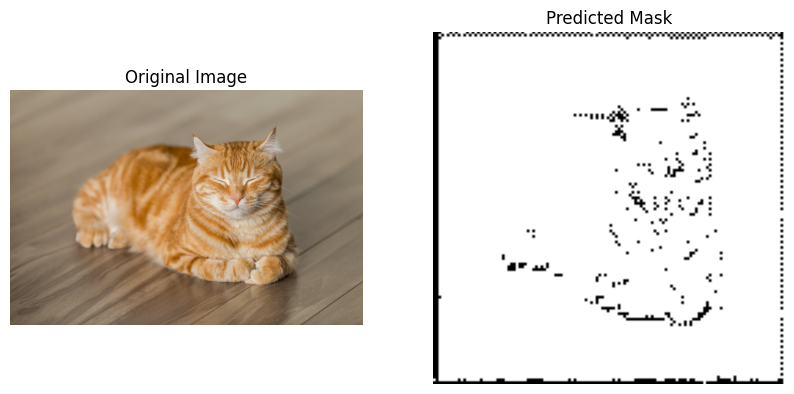

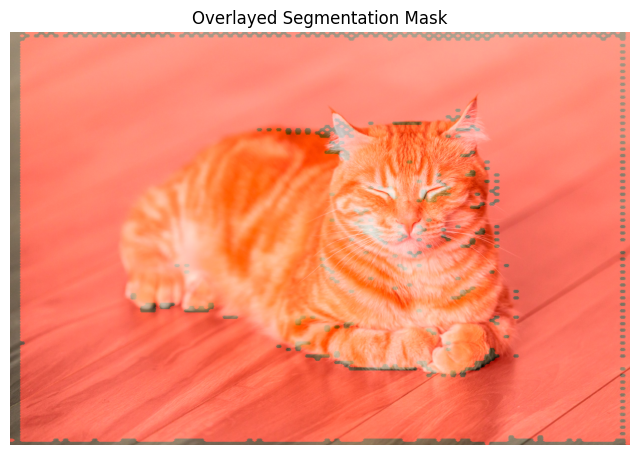

In [8]:
# Load the trained model
model = tf.keras.models.load_model("unet_model.h5")

# Function to preprocess the input image
def preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)  # Read image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    image = cv2.resize(image, target_size)  # Resize
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to predict segmentation mask
def predict_segmentation(image_path, model):
    input_image = preprocess_image(image_path)
    pred_mask = model.predict(input_image)[0, :, :, 0]  # Get 2D mask
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Convert to binary mask
    return pred_mask

# Function to visualize results
def visualize_results(image_path, pred_mask):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.show()

# Function to overlay mask on image
def overlay_mask(image_path, pred_mask, alpha=0.5):
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    pred_mask = cv2.resize(pred_mask, (original_image.shape[1], original_image.shape[0]))

    # Convert mask to red overlay
    mask_colored = np.zeros_like(original_image)
    mask_colored[:, :, 0] = pred_mask * 255  # Apply red color

    # Blend images
    overlayed = cv2.addWeighted(original_image, 1, mask_colored, alpha, 0)

    plt.figure(figsize=(8, 8))
    plt.imshow(overlayed)
    plt.title("Overlayed Segmentation Mask")
    plt.axis("off")
    plt.show()

# Apply segmentation on an image
image_path = "/content/cat.png"  # Replace with your image file
pred_mask = predict_segmentation(image_path, model)

# Display results
visualize_results(image_path, pred_mask)
overlay_mask(image_path, pred_mask)


In [9]:
output_path = "segmented_output.png"
cv2.imwrite(output_path, (pred_mask * 255))
print(f"Segmented mask saved at: {output_path}")


Segmented mask saved at: segmented_output.png
